In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.gray()

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

<Figure size 432x288 with 0 Axes>

In [2]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### labels meaning
0- T-shirt<br/>
1- pants<br/>
2- sweater<br/>
3- dress<br/>
4- coat<br/>
5- sandals<br/>
6- shirt<br/>
7- sneakers<br/>
8- bag<br/>
9- boots

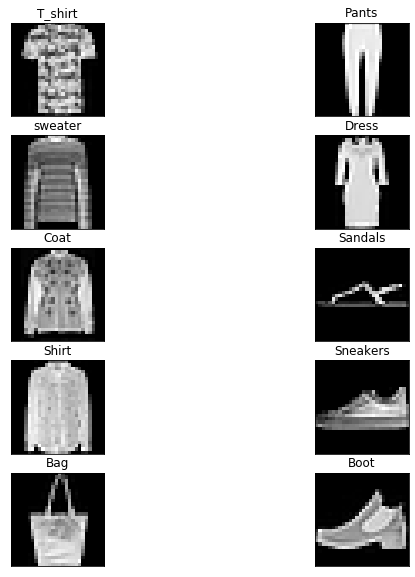

In [3]:
class_names = ['T_shirt', 'Pants', 'sweater', 'Dress', 'Coat', 
               'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Boot']
plt.figure(figsize=(10, 10))
i = 0
indx = 0 
sample_arr = np.zeros(10, dtype = int)
while(i<=9):
    if(df['label'][indx] == i):
        plt.subplot(5, 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(df.drop(['label'], axis = 1).to_numpy()[indx].reshape((28,28)))
        label_index = df['label'][indx]
        plt.title(class_names[label_index])
        i = i+1
        indx = 0
    indx = indx+1
plt.show()

In [4]:
y = df['label'].copy()
X = df.drop(['label'], axis = 1)

In [81]:
gb = GaussianNB()
ada100 = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada500 = AdaBoostClassifier(n_estimators=500, random_state=0)
rfc = RandomForestClassifier(n_estimators=1000 ,max_depth=2, random_state=0)
mlp = MLPClassifier(random_state=1, activation='logistic', solver='sgd', learning_rate='adaptive')
vc = VotingClassifier(estimators=[('gnb', gb), ('rf', rfc), ('mlp', mlp)], voting='soft')

In [60]:
#cvgb = cross_validate(gb, X, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [61]:
#cvada100 = cross_validate(ada100, X, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [62]:
#cvada500 = cross_validate(ada500, X, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [63]:
#cvrfc = cross_validate(rfc, X, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [64]:
#cvvc = cross_validate(vc, X, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [11]:
pca1 = PCA(n_components= 1)
pca5 = PCA(n_components= 5)

X1 = X.copy()
X5 = X.copy()
pca1.fit(X1)
dfpca1 = pca1.transform(X1)
pca5.fit(X5)
dfpca5 = pca5.transform(X5)

In [12]:
cvmlppca1 = cross_validate(mlp, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [13]:
cvmlppca5 = cross_validate(mlp, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [82]:
cvvcpca1 = cross_validate(vc, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [83]:
cvvcpca5 = cross_validate(vc, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [16]:
cvrfcpca1 = cross_validate(rfc, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [17]:
cvrfcpca5 = cross_validate(rfc, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [18]:
cvgbpca1 = cross_validate(gb, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [19]:
cvada100pca1 = cross_validate(ada100, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [20]:
cvada500pca1 = cross_validate(ada500, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [21]:
cvgbpca5 = cross_validate(gb, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [22]:
cvada100pca5 = cross_validate(ada100, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [23]:
cvada500pca5 = cross_validate(ada500, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

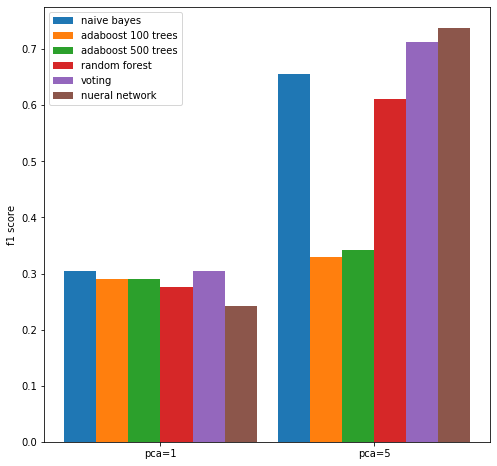

In [84]:
plt.figure(figsize=(8, 8))
N = 2
naive_bayes_means = [ cvgbpca1['test_score'].mean(), cvgbpca5['test_score'].mean()]
adaboost100_means = [ cvada100pca1['test_score'].mean(), cvada100pca5['test_score'].mean()]
adaboost500_means = [ cvada500pca1['test_score'].mean(), cvada500pca5['test_score'].mean()]
randomforest_means = [ cvrfcpca1['test_score'].mean(), cvrfcpca5['test_score'].mean()]
voting_means = [cvvcpca1['test_score'].mean(), cvvcpca5['test_score'].mean()]
mlp_means = [cvmlppca1['test_score'].mean(), cvmlppca5['test_score'].mean()]

ind = np.arange(N) 
width = 0.15  
plt.bar(ind - 2*width, naive_bayes_means, width, label='naive bayes')
plt.bar(ind - width, adaboost100_means, width, label='adaboost 100 trees')
plt.bar(ind, adaboost500_means, width, label='adaboost 500 trees')
plt.bar(ind + width, randomforest_means, width, label='random forest')
plt.bar(ind + 2*width, voting_means, width, label='voting')
plt.bar(ind + 3*width, mlp_means, width, label='nueral network')

plt.ylabel('f1 score')

plt.xticks(ind + width / 2, ['pca=1', 'pca=5'])
plt.legend(loc='best')
plt.show()

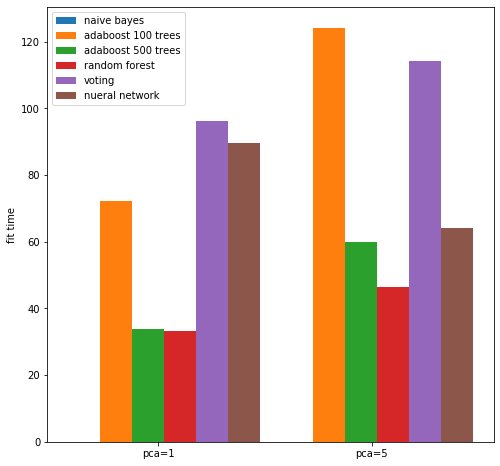

In [85]:
plt.figure(figsize=(8, 8))
N = 2
naive_bayes_means = [ cvgbpca1['fit_time'].mean(), cvgbpca5['fit_time'].mean()]
adaboost100_means = [ cvada100pca1['fit_time'].mean(), cvada100pca5['fit_time'].mean()]
adaboost500_means = [ cvada500pca1['fit_time'].mean(), cvada500pca5['fit_time'].mean()]
randomforest_means = [ cvrfcpca1['fit_time'].mean(), cvrfcpca5['fit_time'].mean()]
voting_means = [ cvvcpca1['fit_time'].mean(), cvvcpca5['fit_time'].mean()]
mlp_means = [cvmlppca1['fit_time'].mean(), cvmlppca5['fit_time'].mean()]


ind = np.arange(N) 
width = 0.15     
plt.bar(ind - 2*width, naive_bayes_means, width, label='naive bayes')
plt.bar(ind - width, adaboost100_means, width, label='adaboost 100 trees')
plt.bar(ind, adaboost500_means, width, label='adaboost 500 trees')
plt.bar(ind + width, randomforest_means, width, label='random forest')
plt.bar(ind + 2*width, voting_means, width, label='voting')
plt.bar(ind + 3*width, mlp_means, width, label='nueral network')

plt.ylabel('fit time')

plt.xticks(ind + width / 3, ['pca=1', 'pca=5'])
plt.legend(loc='best')
plt.show()

In [69]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

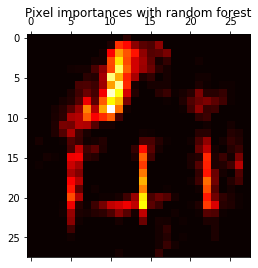

In [70]:
plt.matshow(rfc.feature_importances_.reshape(28,28), cmap=plt.cm.hot)
plt.title("Pixel importances with random forest")
plt.show()

In [71]:
test = pd.read_csv('fashion-mnist_test.csv')
y_test = test['label']
X_test = test.drop(['label'], axis=1)

In [72]:
pca5.fit(X_test)
X_test = pca5.transform(X_test)

In [73]:
mlp.fit(dfpca5, y)

C:\Users\roeeg\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [74]:
y_pred = mlp.predict(X_test)

In [75]:
f1_score(y_test, y_pred, average='micro')

0.5088